In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\lenovo\Desktop\ML ASS2\AutoData (1).csv')
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [9]:
df.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [3]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

droping not necessary colummns(Attributes)

In [10]:
df.drop(['make','symboling'],axis=1,inplace=True)   #drop un unsed values in data 
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
missing_data = df.isnull().sum()
missing_data.sort_values(inplace=True, ascending=False)
missing_data.head()

price         0
curbweight    0
aspiration    0
doornumber    0
carbody       0
dtype: int64

(205, 23)

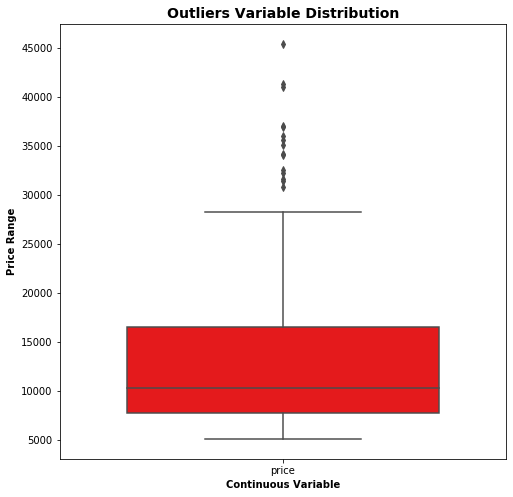

In [18]:
# Outlier Analysis of target variable with maximum amount of Inconsistency
outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

There are some price ranges above 36000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.

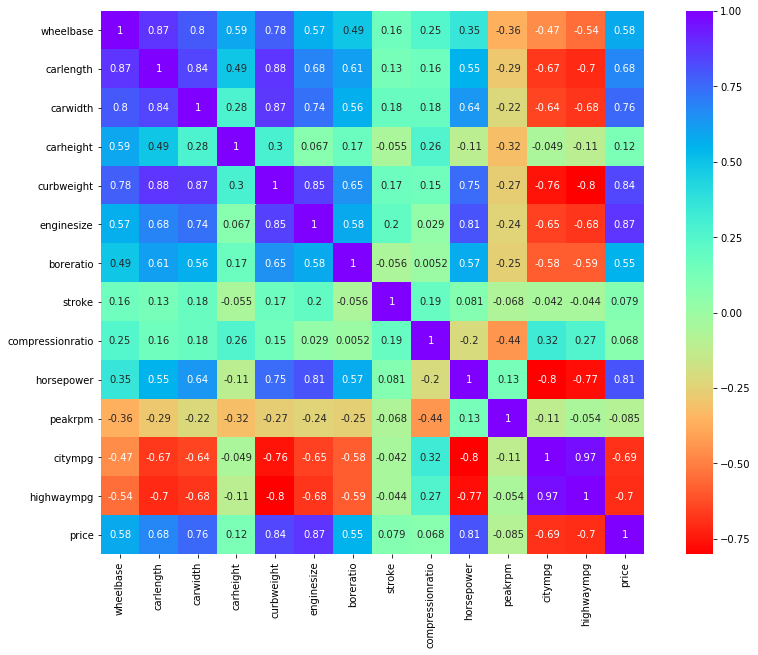

In [23]:
plt.subplots(figsize=(15,10))
sns_plot = sns.heatmap(df.corr(),annot =True,cmap='rainbow_r',square=True)
fig = sns_plot.get_figure()
fig.savefig("corrHeatmap.png")

# Visualizing the distribution of car prices

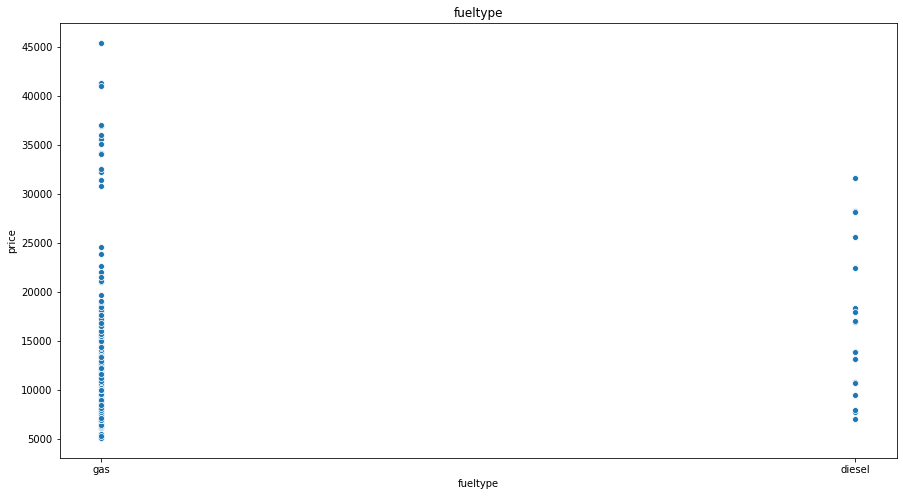

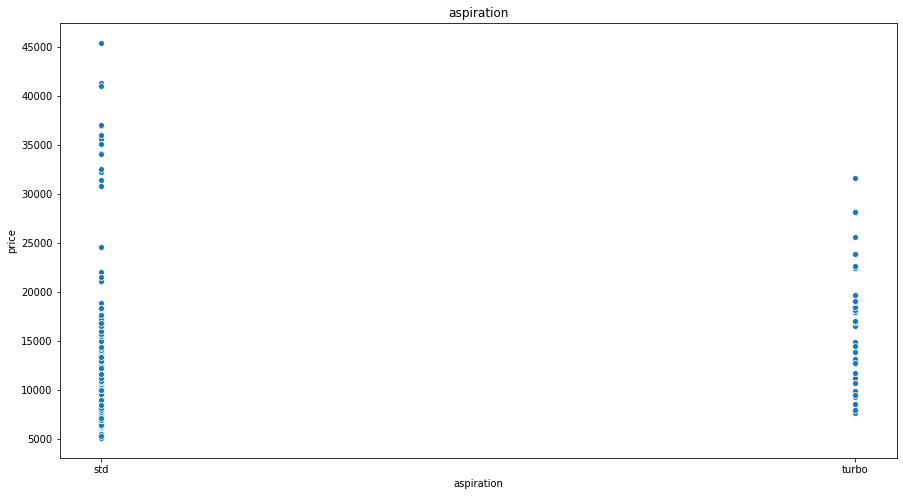

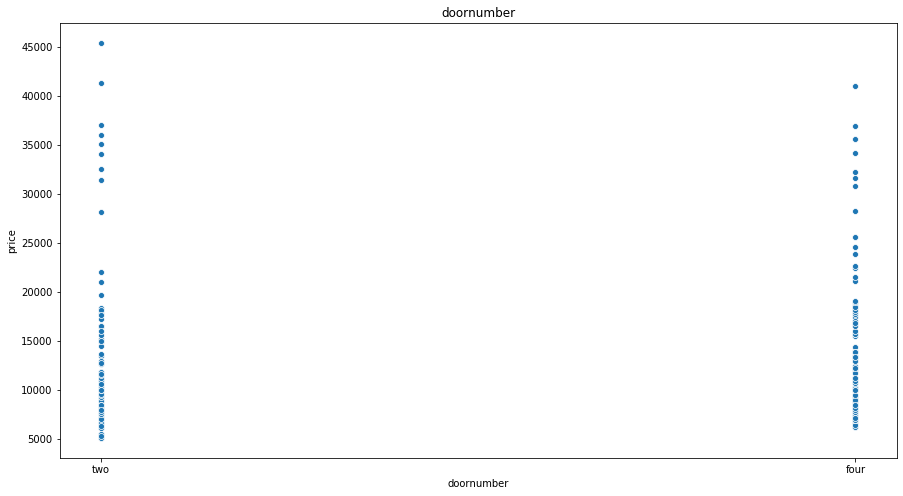

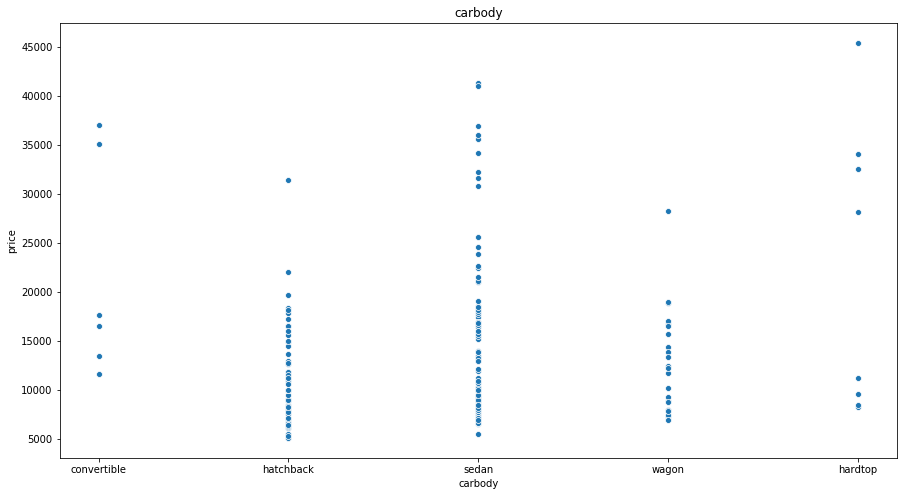

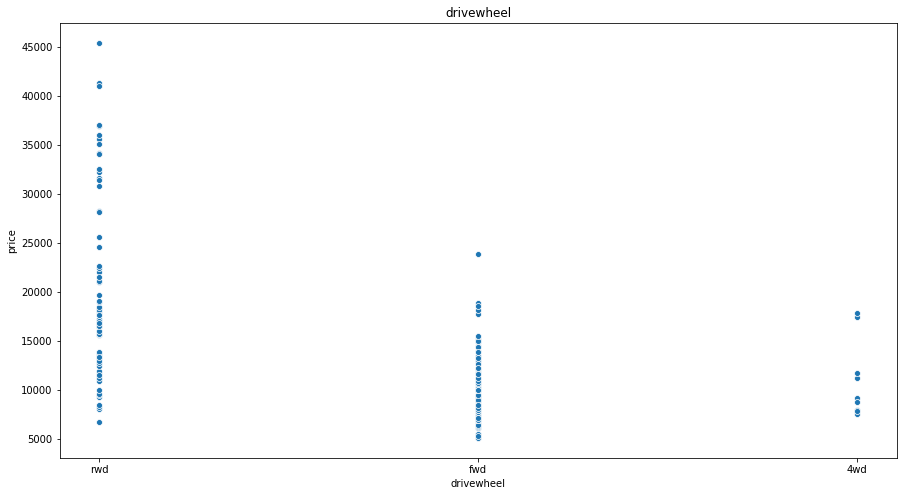

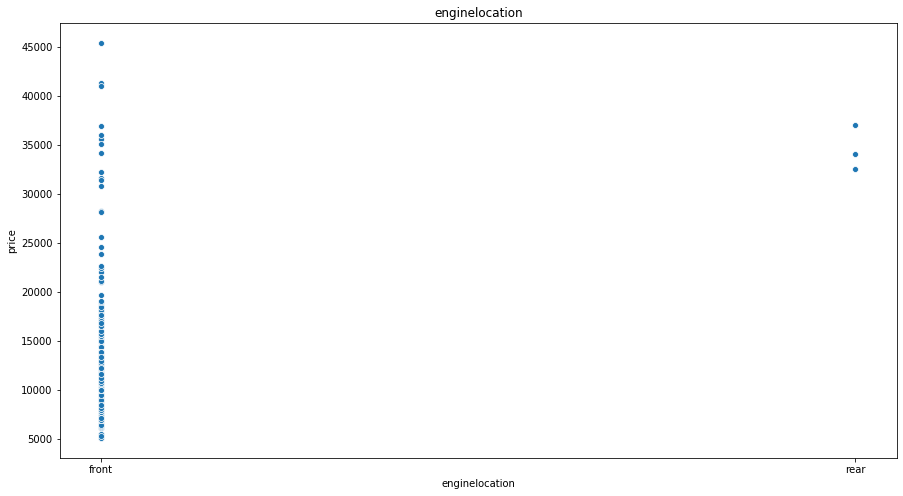

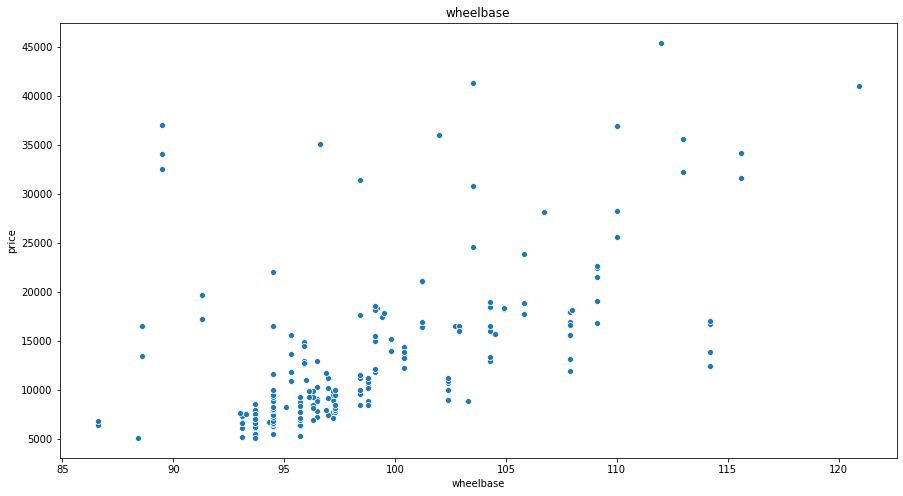

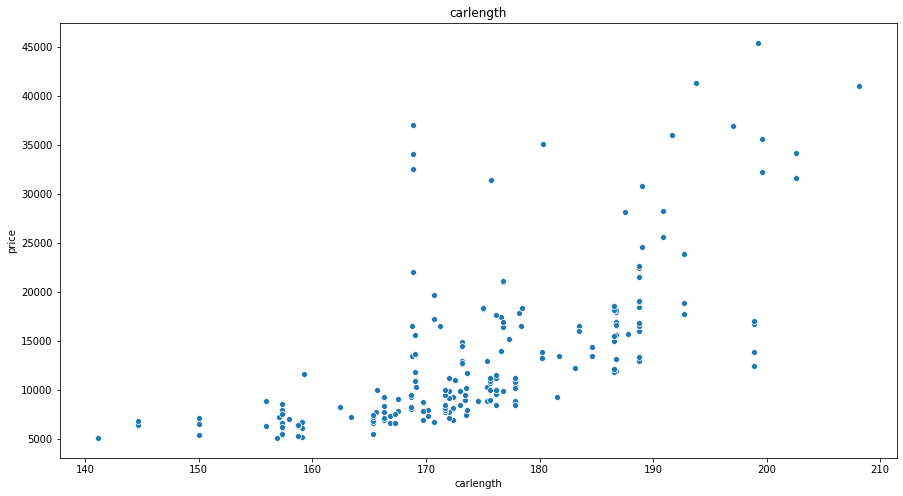

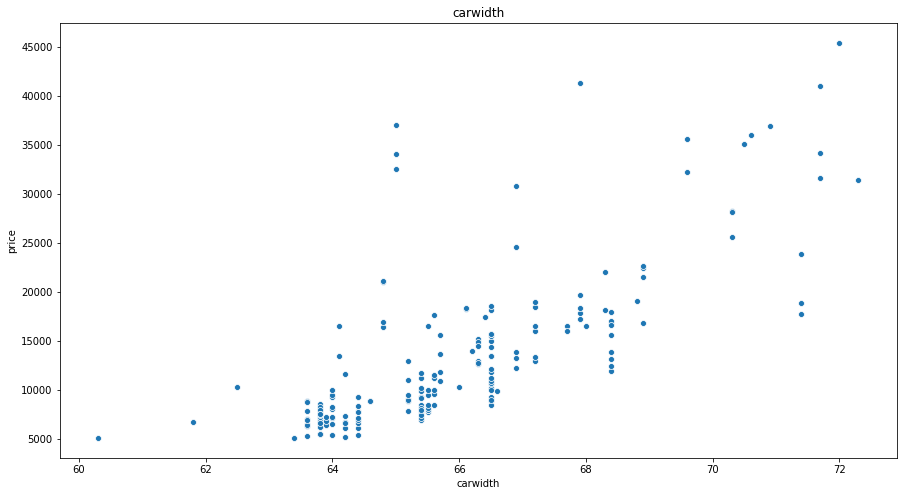

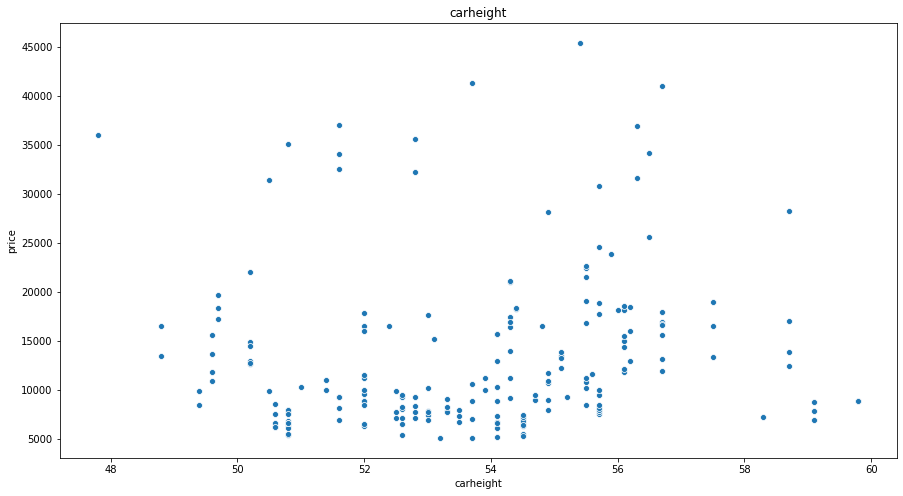

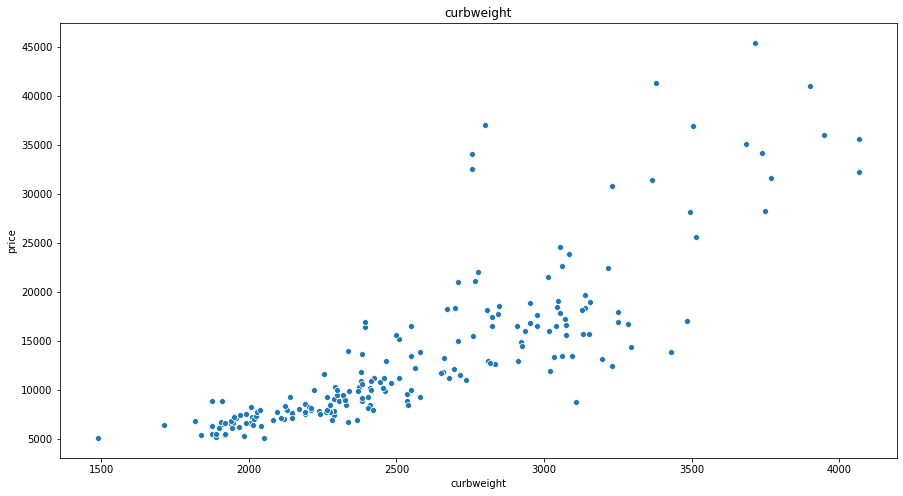

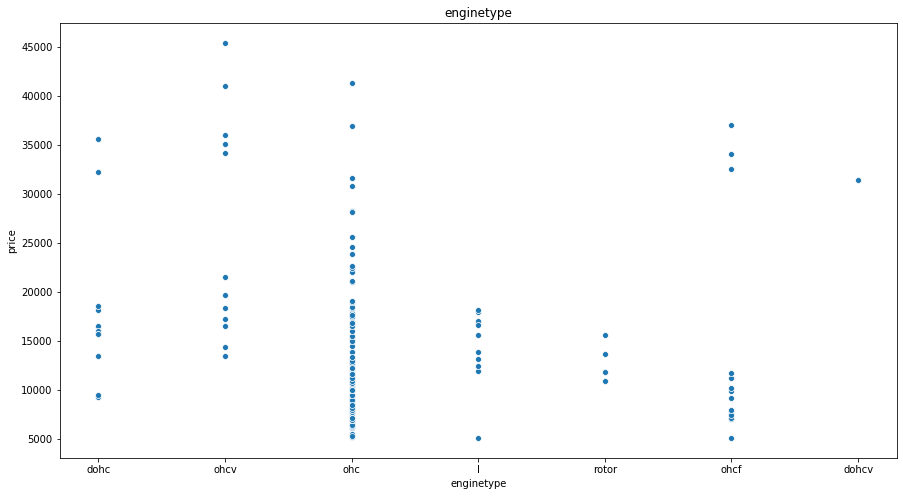

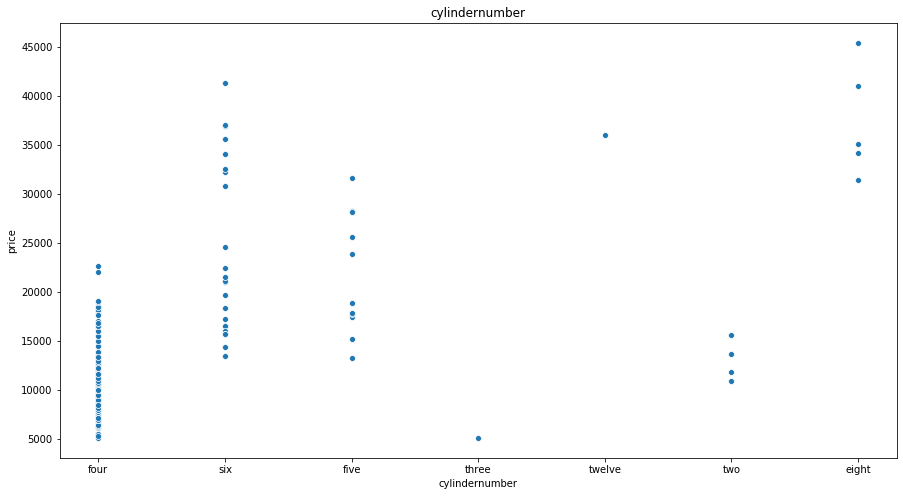

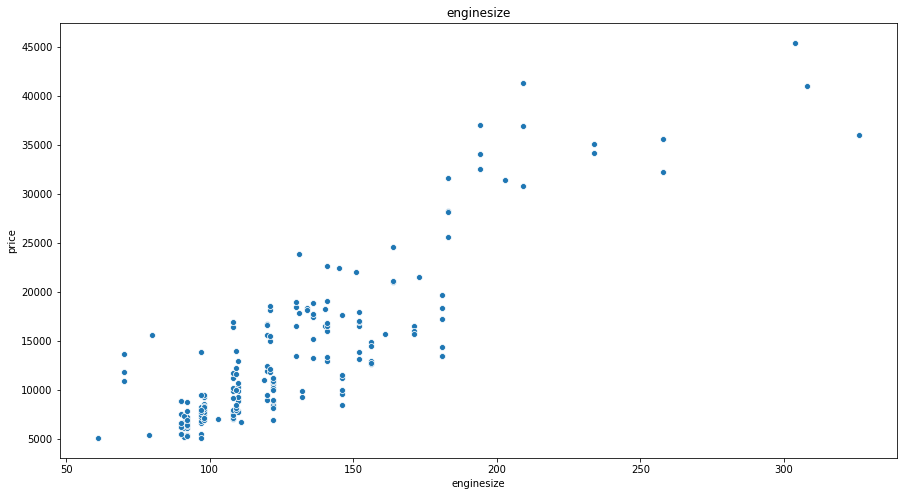

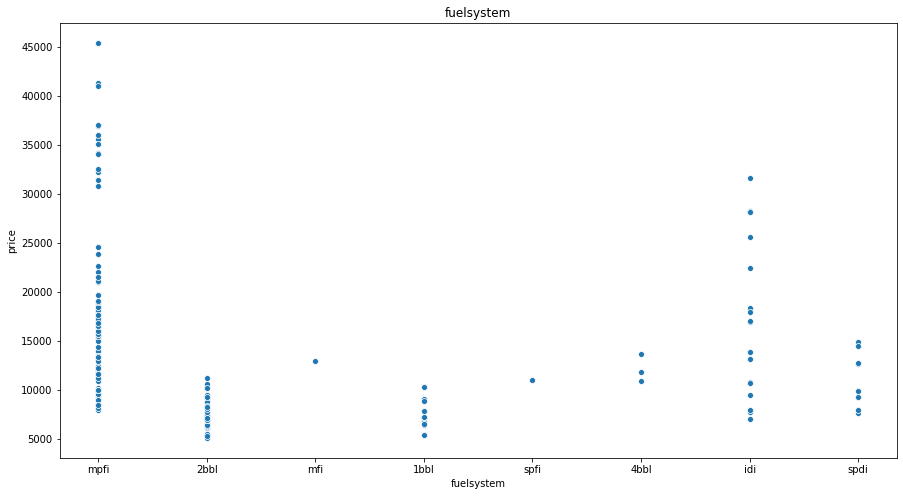

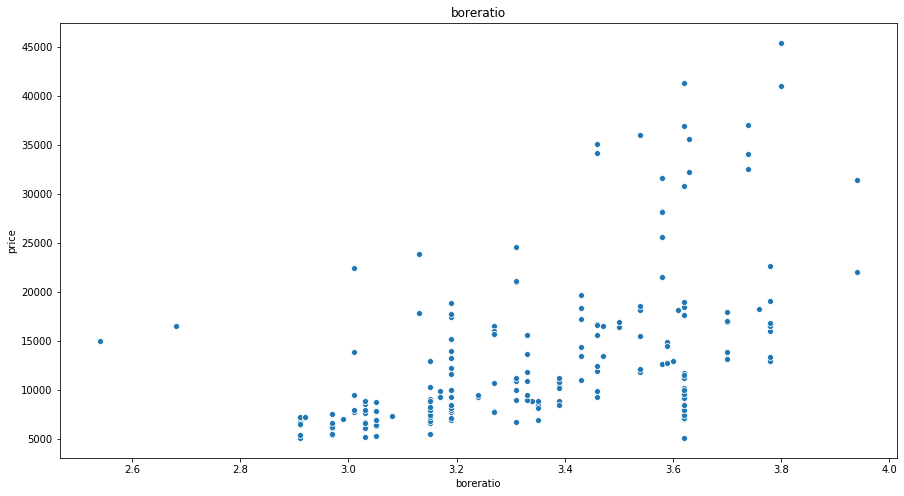

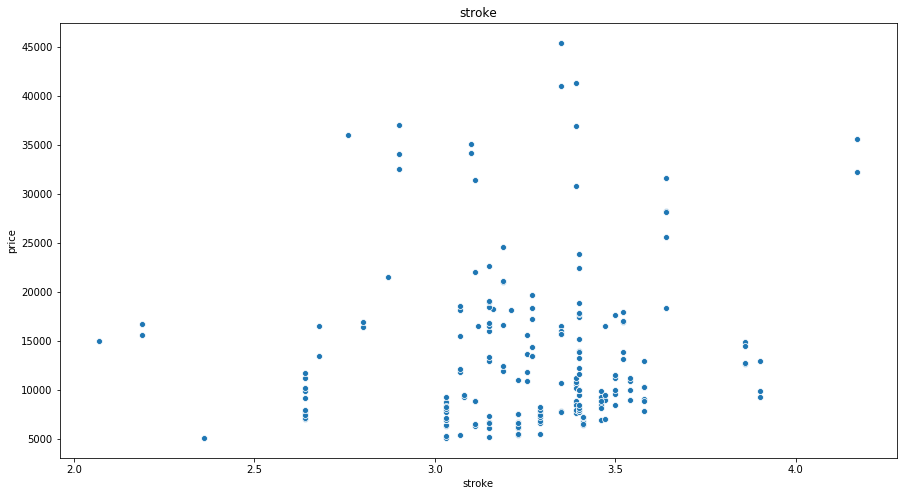

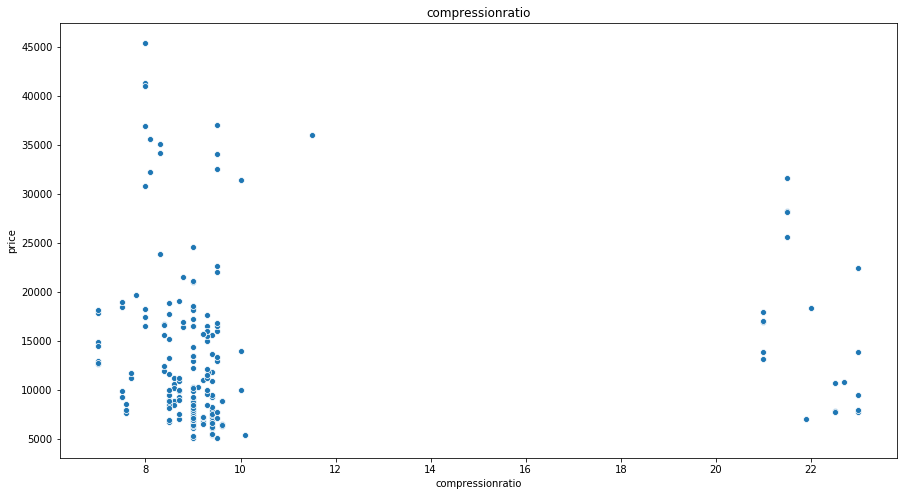

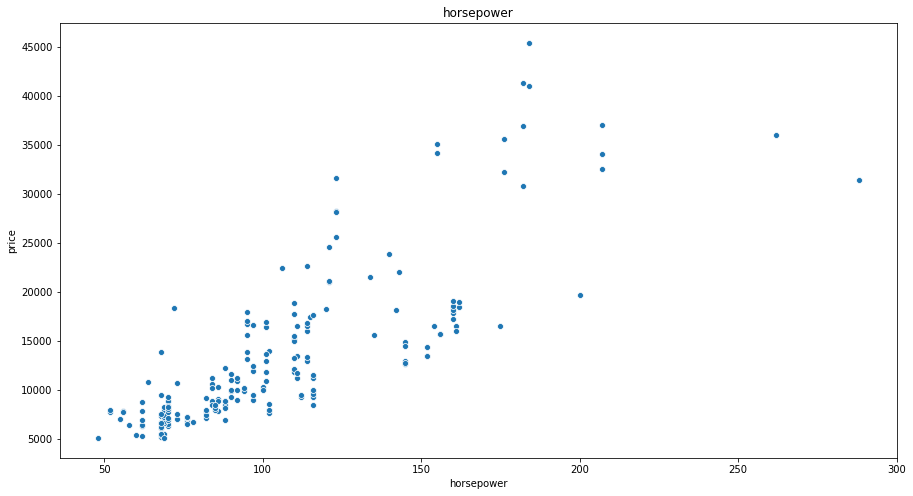

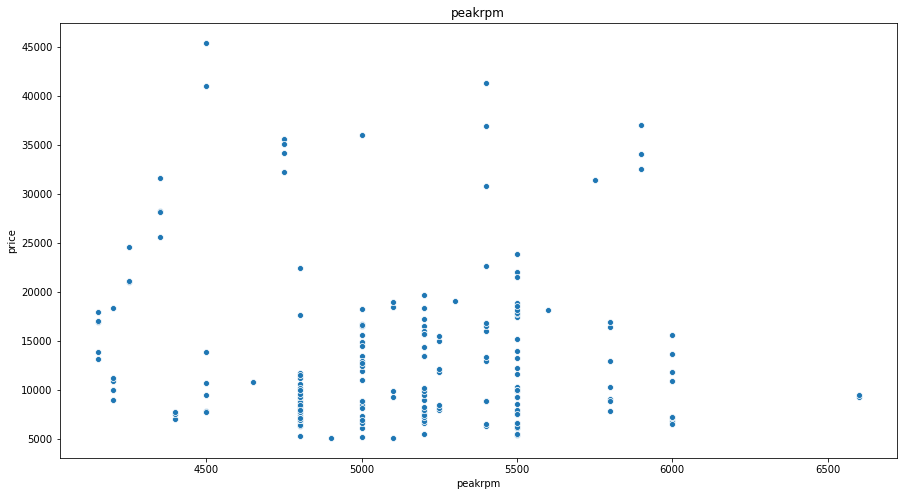

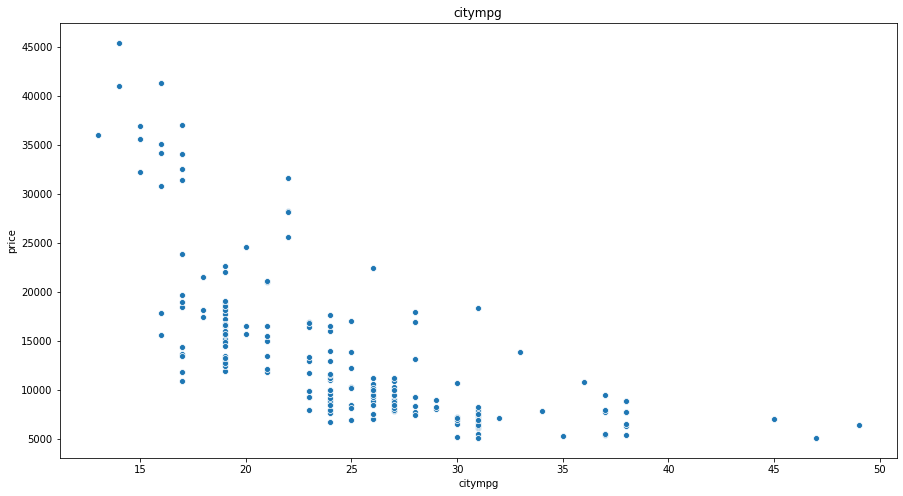

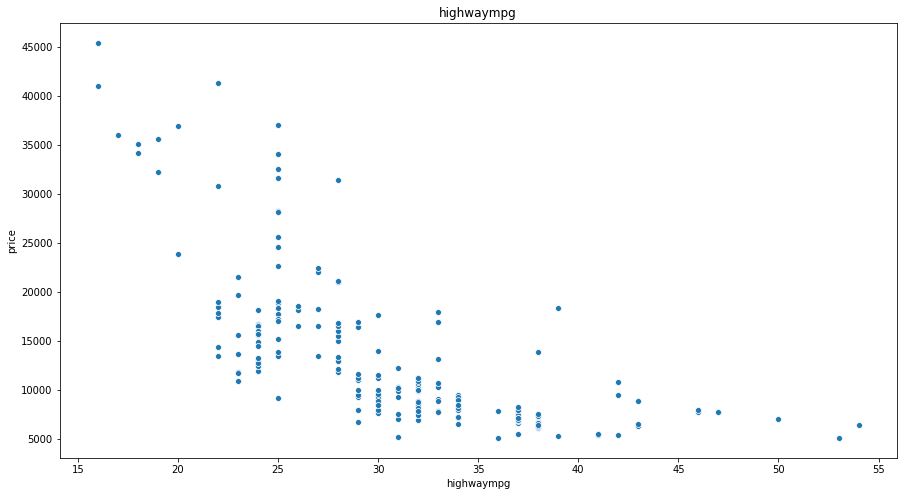

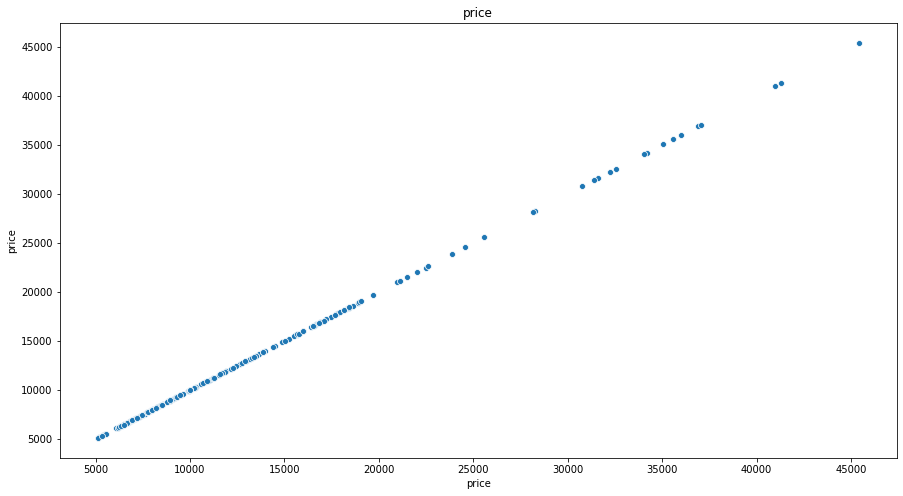

In [36]:
for i in df.columns:
    plt.title(i)
    sns.scatterplot(df[i],df['price'])
    plt.show()

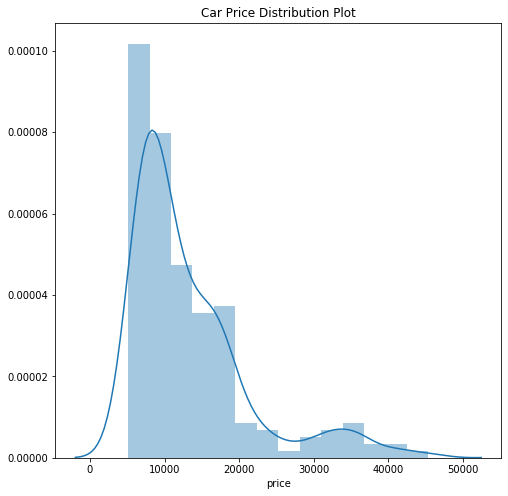

In [37]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.

# Visualising Numeric Variables

In [29]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

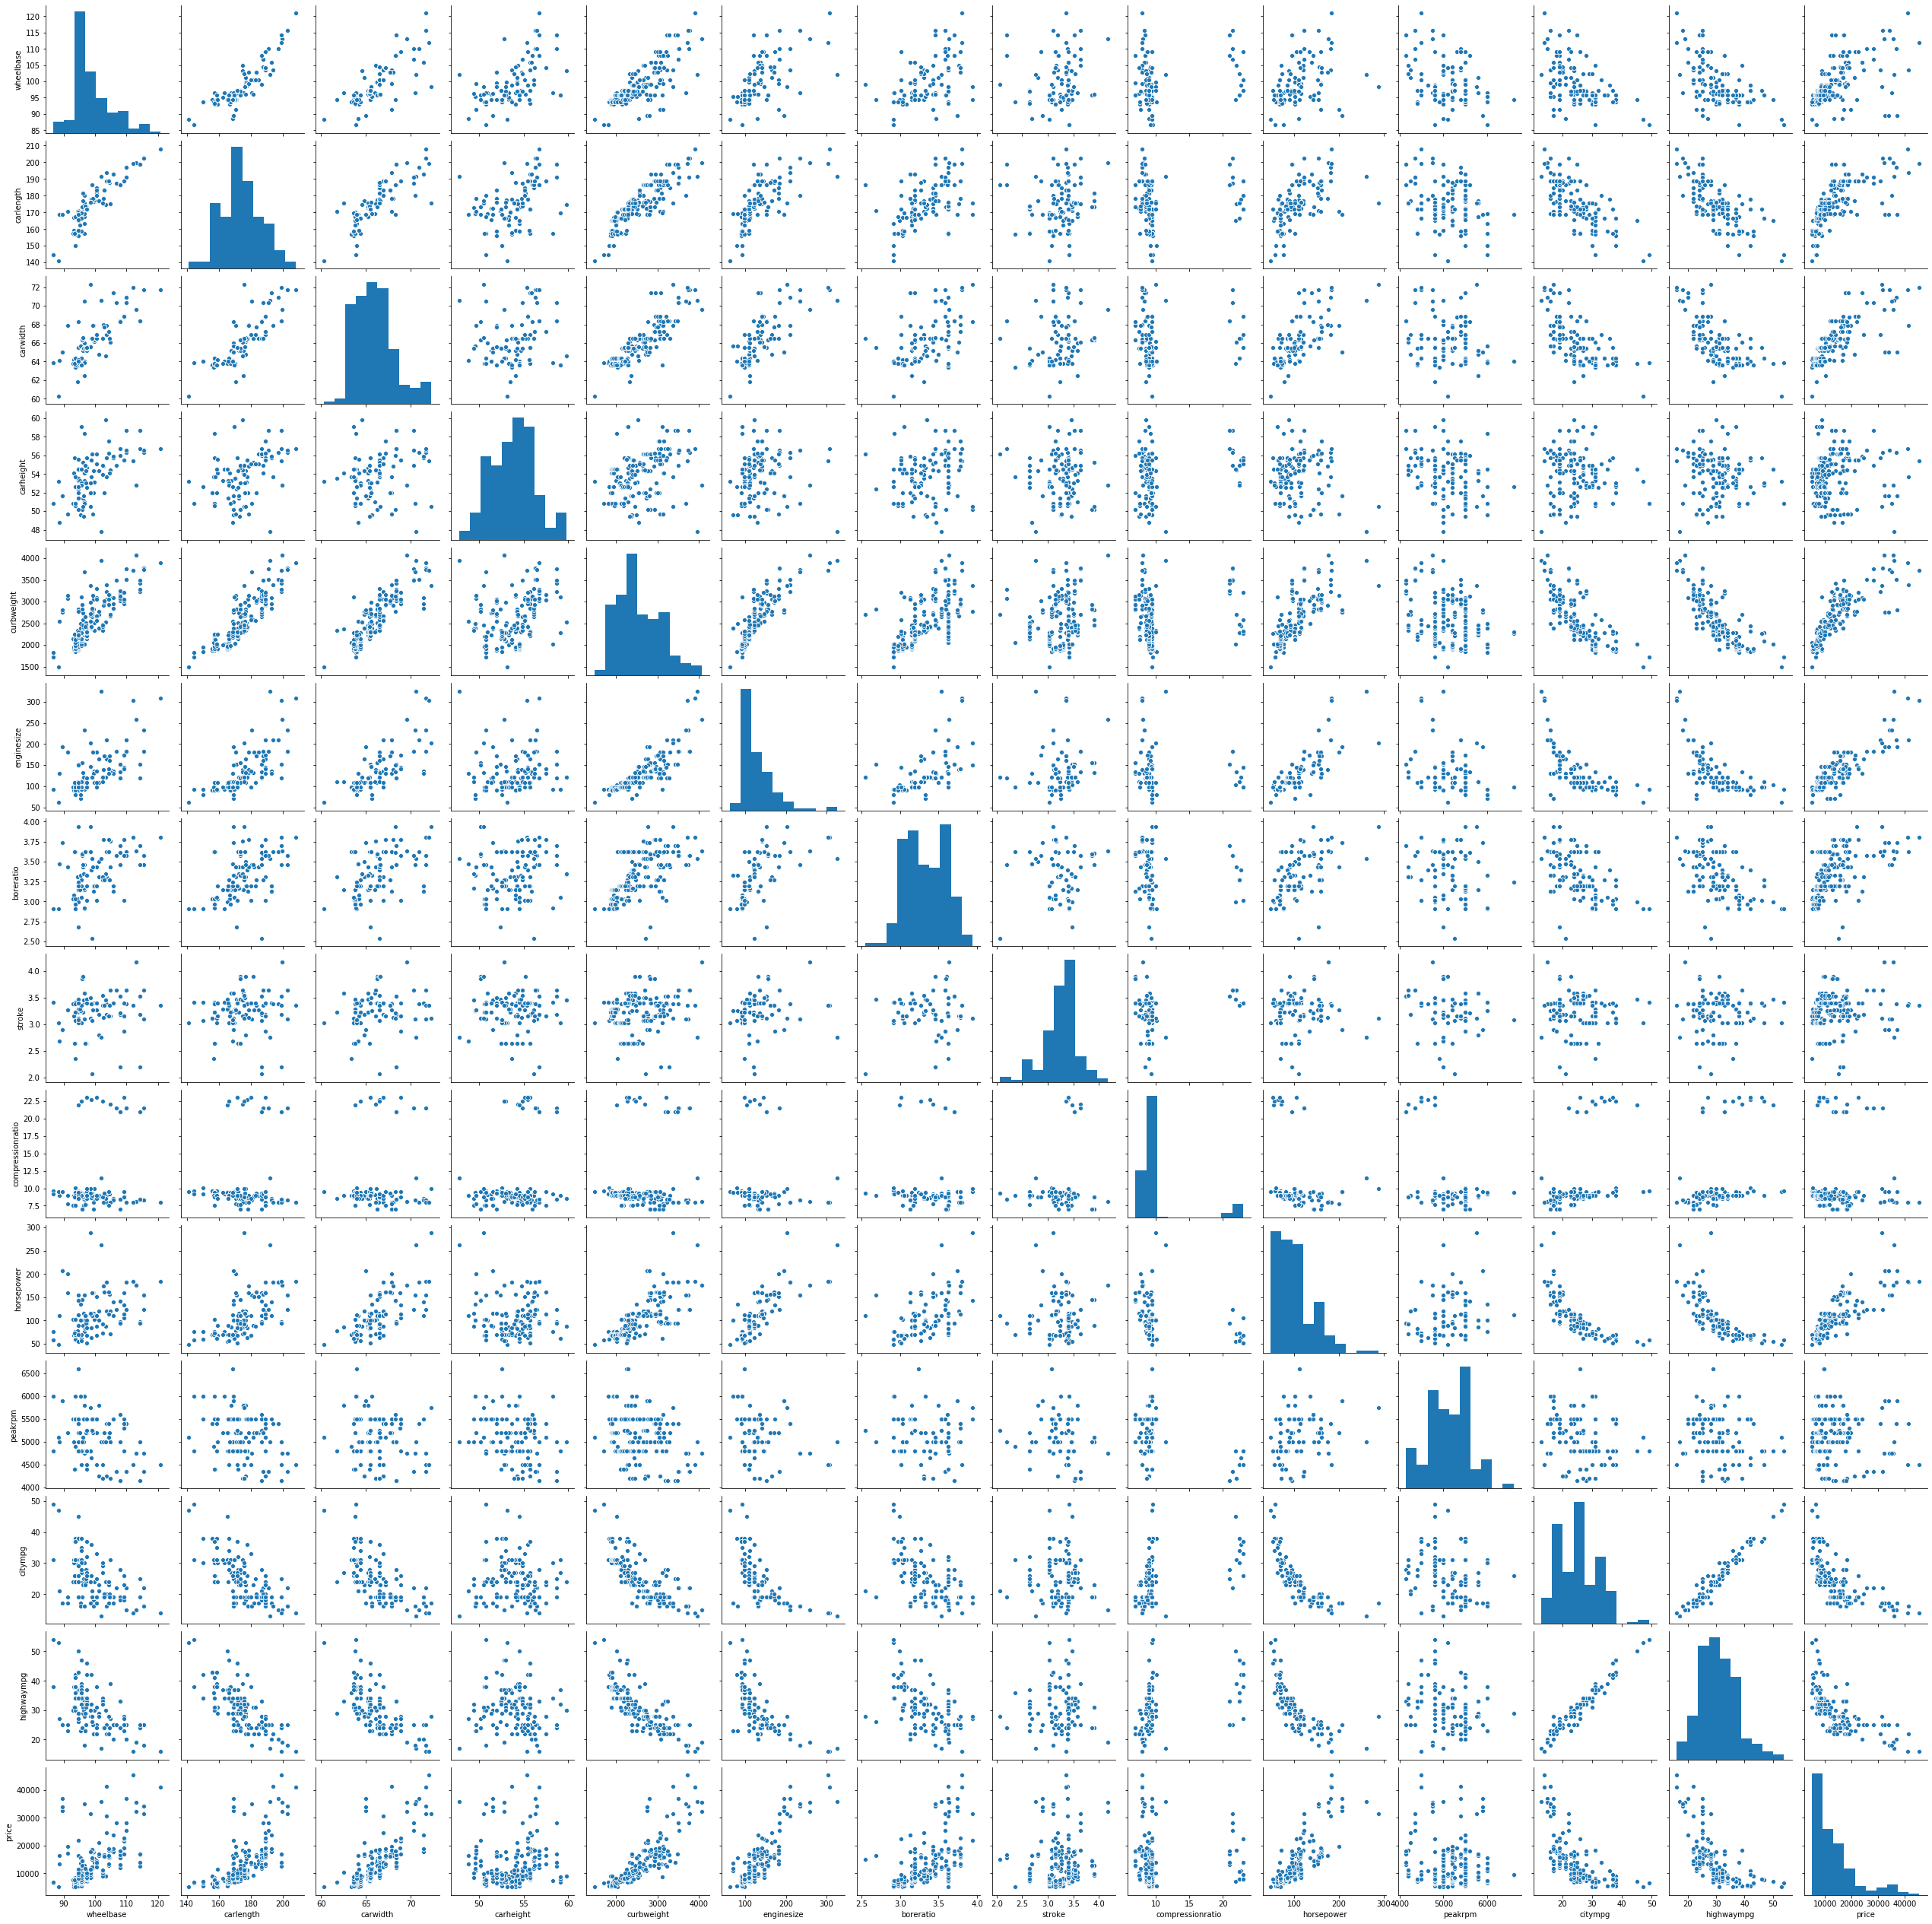

In [32]:
ax = sns.pairplot(df[num_col])

carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price.

carheight doesn't show any significant trend with price.

citympg , highwaympg - seem to have a significant negative correlation with price.

# Data PreProcessing

In [38]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [41]:
df1 = df.drop({'carlength','carwidth','aspiration', 'doornumber','carbody','drivewheel','carheight',"enginelocation"},axis=1)
df1

,fueltype,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,109.1,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,109.1,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,109.1,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,109.1,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [42]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1['fueltype']= label_encoder.fit_transform(df['fueltype']) 
df1['fueltype'].unique()

array([1, 0])

In [43]:
df1

,fueltype,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,109.1,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,1,109.1,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,1,109.1,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0,109.1,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [44]:
df1['enginetype']= label_encoder.fit_transform(df['enginetype']) 
df1['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [45]:
df1['fuelsystem']= label_encoder.fit_transform(df['fuelsystem']) 
df1['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [47]:
from word2number import w2n
nums = []
for i in df1['cylindernumber']:
    x = w2n.word_to_num(i)
    nums.append(x)
df1['cylindernumber'] = nums

In [48]:
df1

,fueltype,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,88.6,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,99.8,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,99.4,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,109.1,2952,3,4,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,1,109.1,3049,3,4,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,1,109.1,3012,5,6,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0,109.1,3217,3,6,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


# Linear Regression

Self Analysis based feature

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

In [50]:
X = df1[['horsepower']]#.values.reshape(1,-1)
y = df1[['price']]#.values.reshape(1,-1)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
r2_score(y_pred,y_test)


0.27979618506336734

In [52]:
print('Coefficient is',LR.coef_[0][0])
print('intercept is',LR.intercept_[0])

Coefficient is 157.52524028053594
intercept is -3241.804243638466


Text(27.125, 0.5, 'Price')

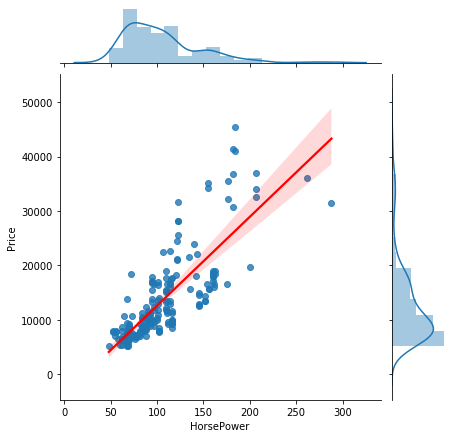

In [53]:
g = sns.jointplot(X,y,kind='reg',
                 joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('HorsePower')
plt.ylabel('Price')

<function matplotlib.pyplot.show(*args, **kw)>

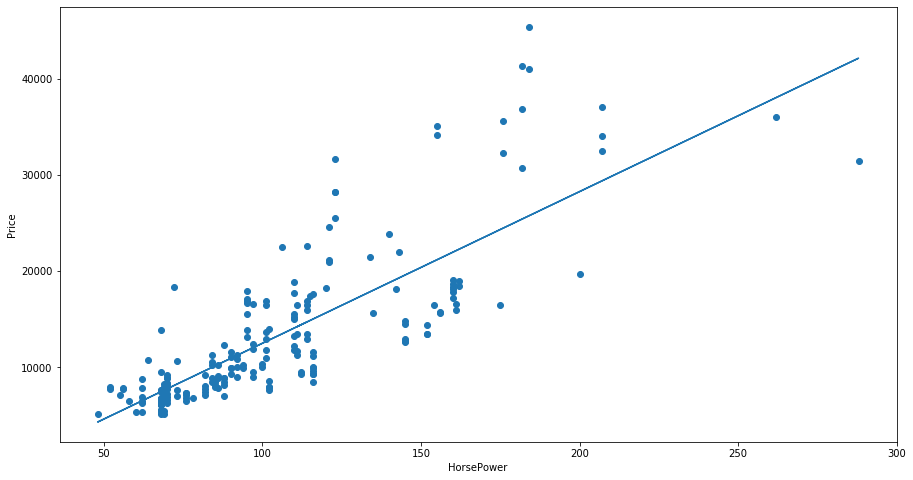

In [54]:
plt.scatter(X,y)
plt.plot(X,LR.predict(X))
plt.xlabel('HorsePower')
plt.ylabel('Price')
plt.show


In [56]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1854.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                   2.43e-104
Time:                        17:18:40   Log-Likelihood:                         -2031.7
No. Observations:                 205   AIC:                                      4065.
Df Residuals:                     204   BIC:                                      4069.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We see the Regression LIne is in Best Fit in Hoursepower

RFE selected Feature

In [58]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [59]:
X = df1.drop('price',axis=1)
y = df1['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
model = LinearRegression()
rfe = RFE(model, 1)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [60]:
X_train.columns[rfe.support_]

Index(['boreratio'], dtype='object')

In [61]:
## Model Building
X = df[['boreratio']]
y = df[['price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_train)
print("R2 score is",r2_score(y_pred,y_test))
print('Coefficient is',LR.coef_[0][0])
print('intercept is',LR.intercept_[0])

R2 score is 0.27979618506336734
Coefficient is 15631.185368192808
intercept is -38495.77664498373


<function matplotlib.pyplot.show(*args, **kw)>

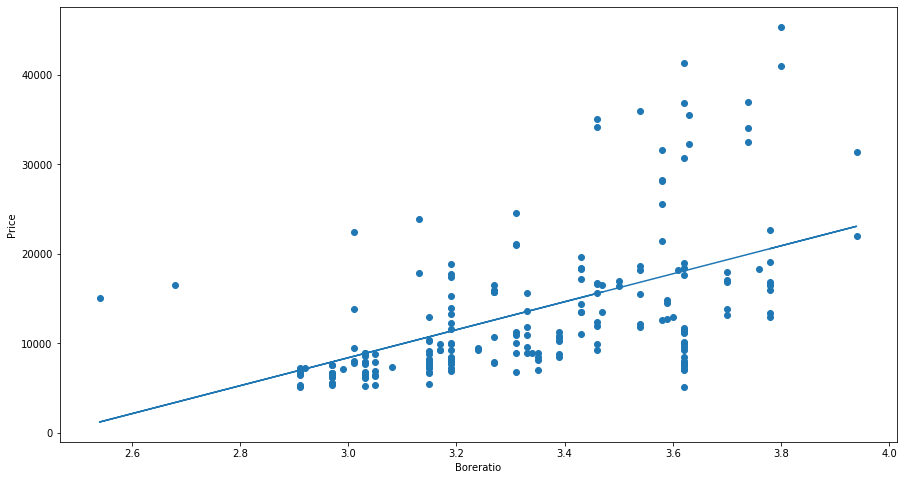

In [62]:
plt.scatter(X,y)
plt.plot(X,LR.predict(X))
plt.xlabel('Boreratio')
plt.ylabel('Price')
plt.show

Text(27.125, 0.5, 'Price')

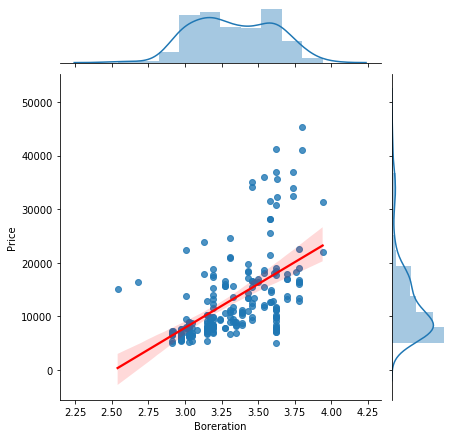

In [63]:
g = sns.jointplot(X,y,kind='reg',
                 joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('Boreration')
plt.ylabel('Price')

In [64]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                              683.8
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                    4.56e-67
Time:                        17:20:34   Log-Likelihood:                         -2117.9
No. Observations:                 205   AIC:                                      4238.
Df Residuals:                     204   BIC:                                      4241.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The R-squared value obtained is 0.27. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. curbweight.

# Multiple Linear Regression

feature selection

In [65]:
df1.columns

Index(['fueltype', 'wheelbase', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [66]:
X = df1.drop('price',axis=1)
y = df1['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
LR.fit(X_train.values,y_train)
y_pred = LR.predict(X_test)
print("R2 score is",r2_score(y_pred,y_test))
print('Coefficient is',LR.coef_)
print('intercept is',LR.intercept_)

R2 score is 0.7960471923142374
Coefficient is [-9.61508240e+02  1.80824621e+02  8.63184056e-01  3.28219723e+02
 -1.02503351e+03  1.46040653e+02 -2.43596796e+00 -2.39700473e+03
 -3.73403776e+03  2.37349767e+02  3.31527115e+01  2.39355094e+00
 -2.96171503e+02  1.27024990e+02]
intercept is -15385.491091622373


In [67]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              338.9
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                   1.36e-126
Time:                        17:26:06   Log-Likelihood:                         -1935.3
No. Observations:                 205   AIC:                                      3899.
Df Residuals:                     191   BIC:                                      3945.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# RFE Based features

In [68]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()
model = LinearRegression()

In [71]:
## Selecting Top 7 Features
rfe = RFE(model, 7)
X_train1 = scaler.fit_transform(X_train)
rfe.fit(X_train1,y_train)
X_train.columns[rfe.support_]

Index(['wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'],
      dtype='object')

In [72]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 7
Selected Features: [False  True False False False  True False False  True  True  True  True
  True False]
Feature Ranking: [7 1 6 5 2 1 8 3 1 1 1 1 1 4]


In [73]:
#X = df1[{'symboling', 'fueltype', 'boreratio', 'compressionratio', 'citympg'}]
X = df1[{'wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'}]
y = df1['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_train)
print("R2 score is",r2_score(y_pred,y_test))
print('intercept is',LR.intercept_)
print('Coefficient are',LR.coef_)

R2 score is 0.7960471923142374
intercept is -20658.419195102804
Coefficient are [ 2.31543530e+00  1.20048878e+02 -2.56375397e+02  2.37727309e+01
  1.72227678e+02  3.24266517e+02 -2.92917424e+03]


# Residual Analysis of the train dat

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [77]:
# Predicting the price of training set.
y_train_price = LR.predict(X_train)


Text(0.5, 0, 'Errors')

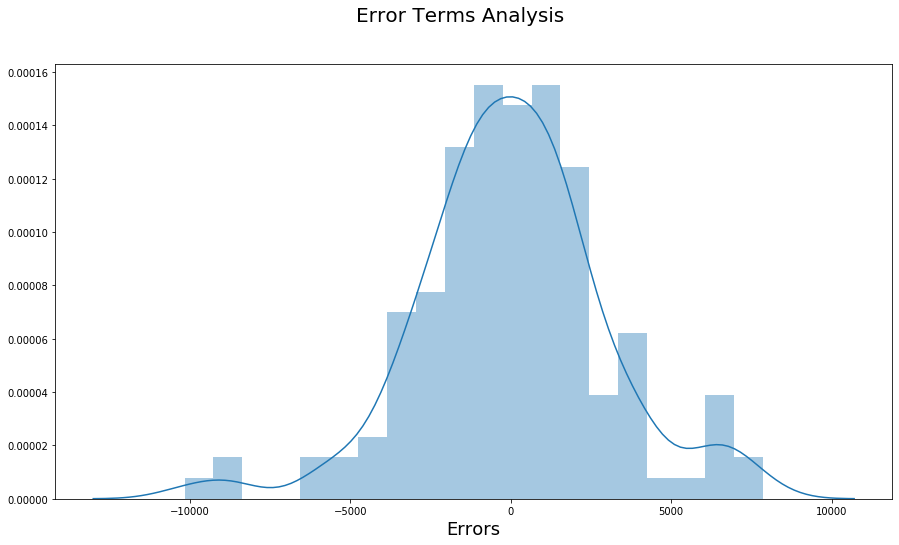

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

# Model Evaluation

Text(0, 0.5, 'y_pred')

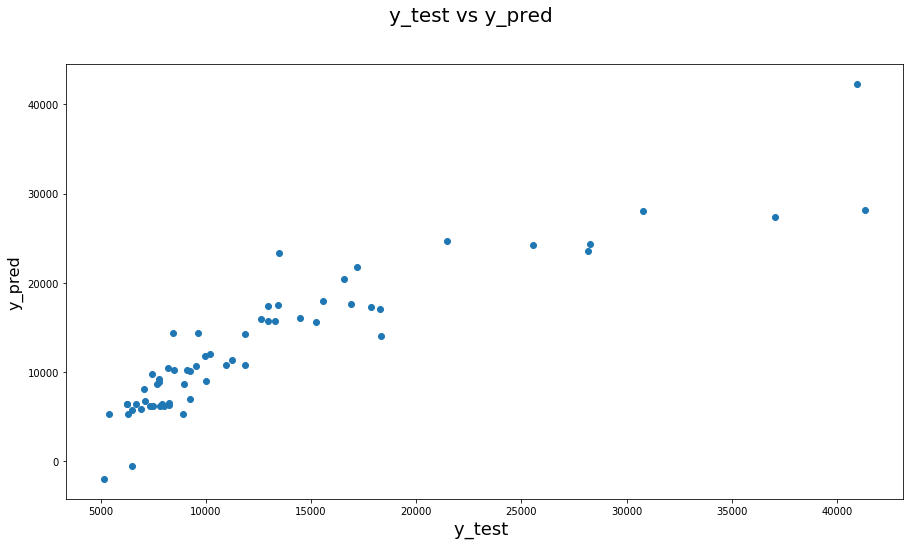

In [83]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)   

# RMSE Score

In [84]:
r2_score(y_test, y_pred)

0.818771427064525

The R2 score of Training set is 0.796 and Test set is 0.818 which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables

wheelbase,
enginesize,
stroke,
compressionratio,
horsepower,
peakrpm, 
citympg